# Shelter Animal Outcomes--Data Exploration

Examine features like breed, color, sex, age, etc. to see if/how they relate to adoption outcomes.

Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 2.7 million dogs and cats are euthanized in the US every year.

### Load, Examine, and Visualize Data

In [1]:
#data handling/prediction
import pandas as pd
import numpy as np

#visualization
%matplotlib inline
import seaborn as sns

### !!! It's ALL categorical !!!

In [2]:
# read data into a DataFrame
data = pd.read_csv("../data/data.csv")
print(data.dtypes)
print(data.shape)

data.head()

AnimalID          object
Name              object
DateTime          object
OutcomeType       object
OutcomeSubtype    object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object
(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


### Types of animals

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64


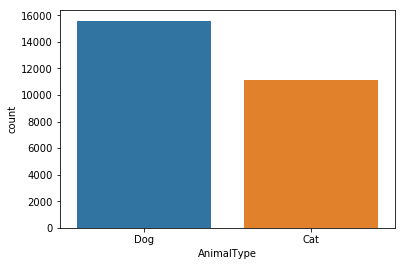

In [6]:
print(data.AnimalType.value_counts())
sns.countplot(data.AnimalType);

### Adoption outcomes

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64


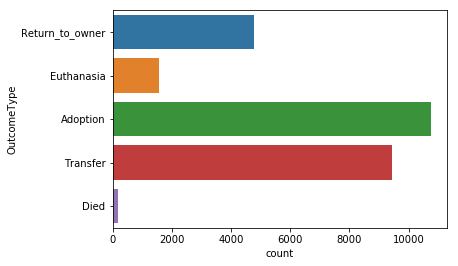

In [7]:
print(data.OutcomeType.value_counts())
sns.countplot(y=data.OutcomeType);

### Sex upon outcome

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64


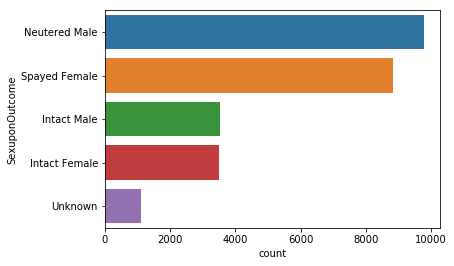

In [8]:
print(data.SexuponOutcome.value_counts())
sns.countplot(y=data.SexuponOutcome);

In [9]:
# Extract sex from the same column that tells us whether animal was neutered, spayed, or left intact
def get_sex(val):
    val = str(val)
    if val.find('Male') >= 0: return 'Male'
    if val.find('Female') >= 0: return 'Female'
    return 'Unknown'

def get_neutered(val):
    val = str(val)
    if val.find('Spayed') >= 0: return 'Spayed'
    if val.find('Neutered') >= 0: return 'Neutered'
    if val.find('Intact') >= 0: return 'Intact'
    return 'Unknown'

print("Before extraction:")
print(data.SexuponOutcome.value_counts())
data["Sex"] = data.SexuponOutcome.apply(get_sex)
data["NeuteredSpayed"] = data.SexuponOutcome.apply(get_neutered)
print("After extraction: ")
print(data.Sex.value_counts())

Before extraction:
Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64
After extraction: 
Male       13304
Female     12331
Unknown     1094
Name: Sex, dtype: int64


### Sex

Male       13304
Female     12331
Unknown     1094
Name: Sex, dtype: int64


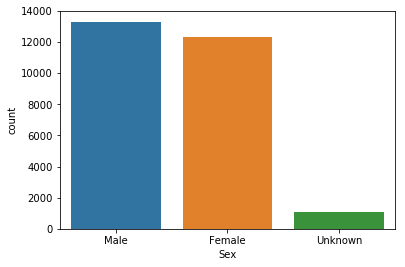

In [10]:
print(data.Sex.value_counts())
sns.countplot(data.Sex);

### Neutered, Spayed, Intact, Unknown

Neutered    9779
Spayed      8820
Intact      7036
Unknown     1094
Name: NeuteredSpayed, dtype: int64


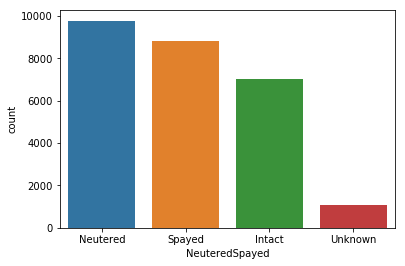

In [11]:
print(data.NeuteredSpayed.value_counts())
sns.countplot(data.NeuteredSpayed);

### Breed purity

In [12]:
# Infer if the breed is pure or a mix based on breed name
def get_mix(val):
    val = str(val)
    if val.find('Mix') >= 0: return 'Mix'
    return 'Pure'

data['PureMix'] = data.Breed.apply(get_mix)

Mix     22298
Pure     4431
Name: PureMix, dtype: int64


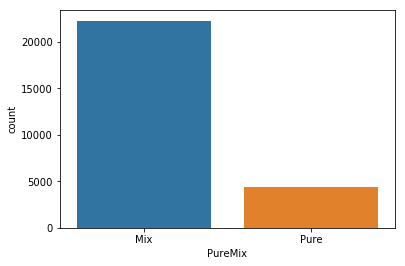

In [13]:
print(data.PureMix.value_counts())
sns.countplot(data.PureMix);

### Sex vs outcomes

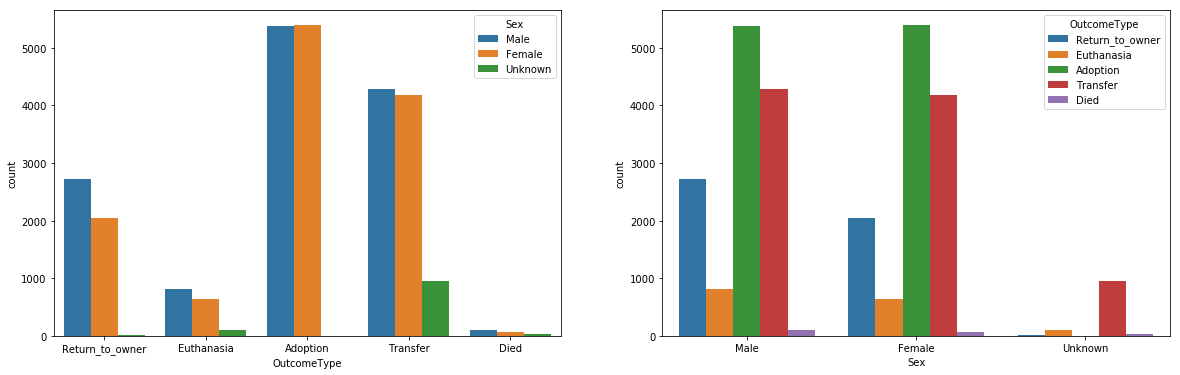

In [14]:
f, (ax1, ax2) = sns.mpl.pyplot.subplots(1, 2, figsize=(20,6))
sns.countplot(data=data, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=data, x='Sex',hue='OutcomeType', ax=ax2);

### Animal type vs outcomes

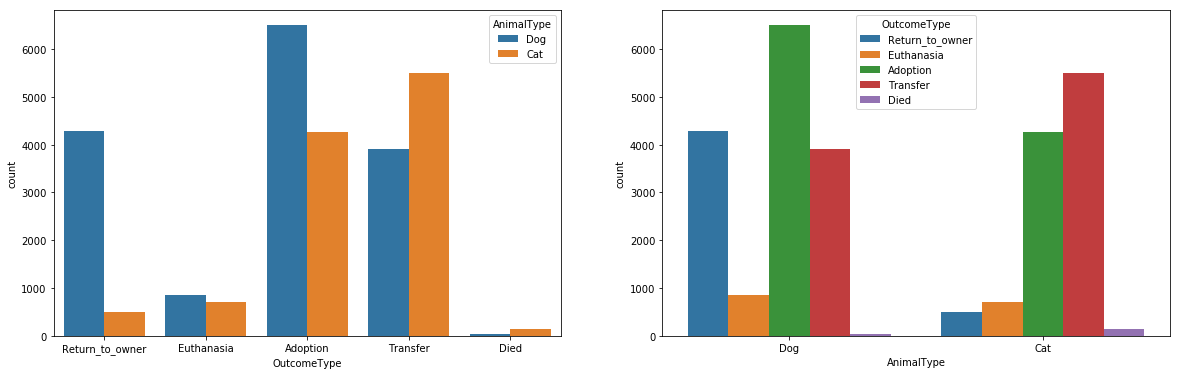

In [15]:
f, (ax1, ax2) = sns.mpl.pyplot.subplots(1, 2, figsize=(20, 6))
sns.countplot(data=data, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=data, x='AnimalType',hue='OutcomeType', ax=ax2);

#### Notes: 
* Dogs tend to be returned to owner more than cats
* Cats are transferred more than dogs

### Neutered, spayed vs outcomes

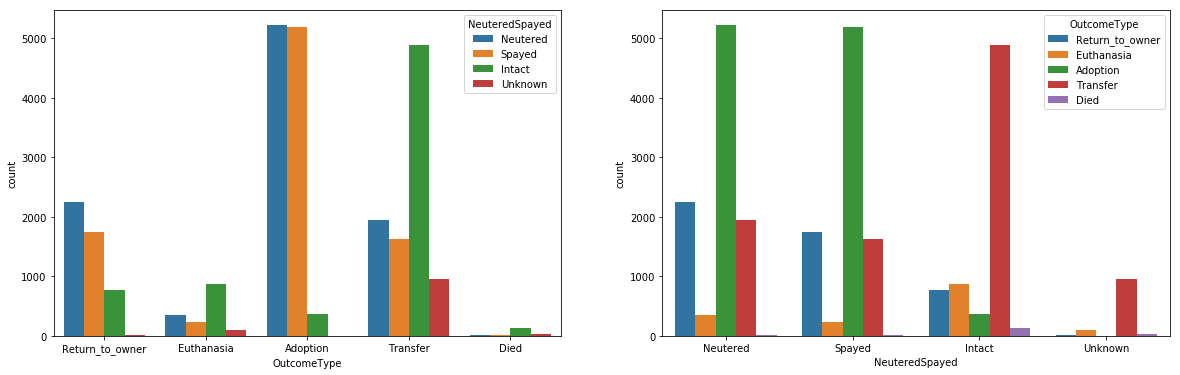

In [16]:
f, (ax1, ax2) = sns.mpl.pyplot.subplots(1, 2, figsize=(20, 6))
sns.countplot(data=data, x='OutcomeType',hue='NeuteredSpayed', ax=ax1)
sns.countplot(data=data, x='NeuteredSpayed',hue='OutcomeType', ax=ax2);

#### Notes: 
* Neutered animals have higher likelihood of being adopted
* Intact animals are more likely to be transferred

### Breed purity vs outcomes

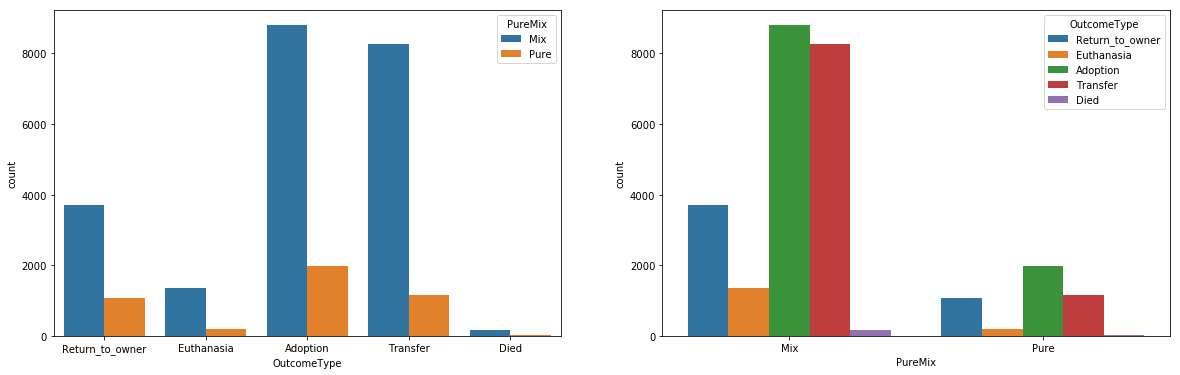

In [17]:
f, (ax1, ax2) = sns.mpl.pyplot.subplots(1, 2, figsize=(20, 6))
sns.countplot(data=data, x='OutcomeType',hue='PureMix', ax=ax1)
sns.countplot(data=data, x='PureMix',hue='OutcomeType', ax=ax2);

#### Notes: 
* This makes sense because there are alot more mix breed dogs and cats than pure bred in the shelter

### For modeling, visit:
https://github.com/iamontheinet/datascience/blob/master/shelter_outcomes/notebooks/Shelter%20Animal%20Outcomes--Modeling.ipynb